# **Modelling and Evaluation**

## **1. Introduction**

## Objectives

- **Answer business requirement 2**
    - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

- inputs/datasets/cherry-leaves/train
- inputs/datasets/cherry-leaves/validation
- inputs/datasets/cherry-leaves/test
- image_shape.pkl file
  
## Outputs

- Plot illustrating how images are distributed within the training, validation, and test sets.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Creating and training a TensorFlow-based machine learning model.
- Save model.
- Graph displaying the learning curve for the model's performance.
- Model evaluation on pickle file.
- Making predictions on a randomly selected leaf image file.


---

## **2. Import packages**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## **3. Setup**

### Working Directory

We need to change the working directory to the projects main directory
* We access the current directory with os.getcwd()

In [2]:
cwd = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


In [3]:
os.chdir('/workspaces/Portfolio-Project-5')
print("\x1b[32mYou set a new current directory\x1b[0m")

You set a new current directory


In [4]:
work_dir = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


---

### Input Directories
- Setting the input directories 

In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

### Output Directories

- Setting the output directories

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

### Labels

- This cell will get the labels for the train dataset

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


---

### Image Shape

- Import saved image shape embedding

In [8]:
import joblib
version = 'v1'
# image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape = (256, 256, 3)
image_shape

(256, 256, 3)

---

## **4. Number Of Images**

- This function is designed to determine the quantity of images within each label category for the training, validation, and testing datasets.
- We perform this action to determine if there is an even distribution of data among the labels within the datasets.

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




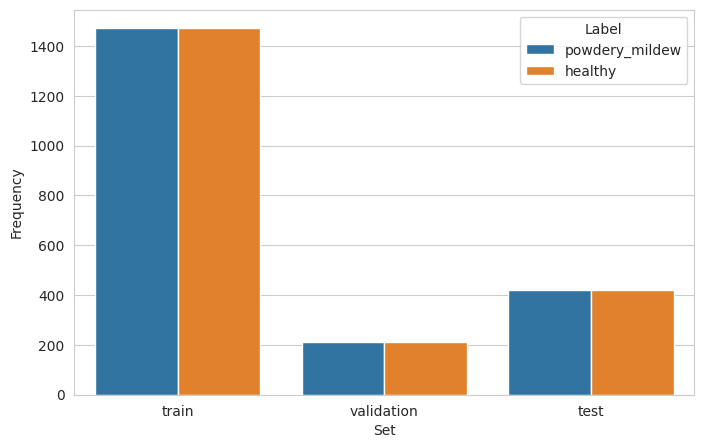

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## **5. Data Augmentation**

### Setup

- Importing package and setting up ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

---

### Augment dataset

- Training

In [12]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Validation

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Test

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

---

### Plot Augmented Dataset

- Training

(20, 256, 256, 3)


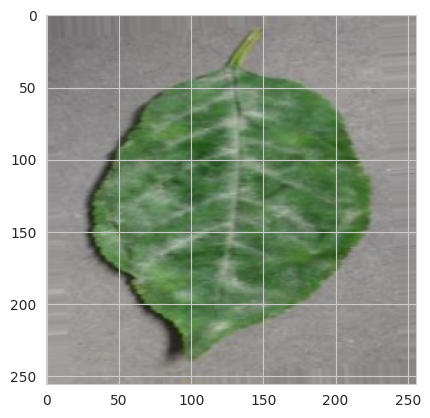

(20, 256, 256, 3)


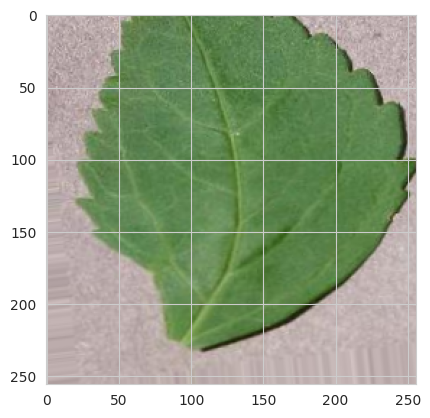

(20, 256, 256, 3)


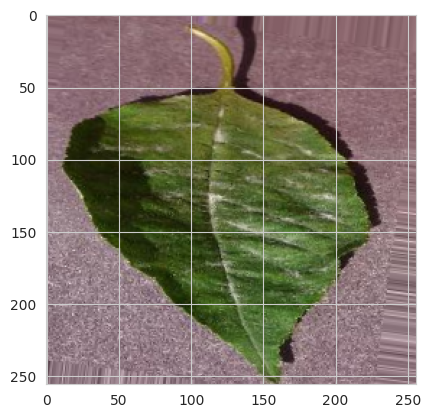

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Validation

(20, 256, 256, 3)


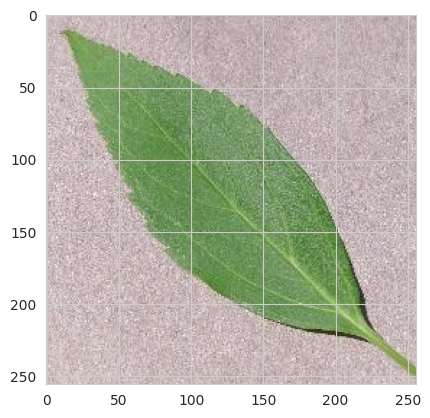

(20, 256, 256, 3)


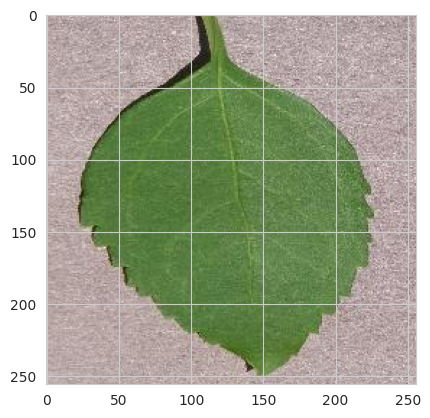

(20, 256, 256, 3)


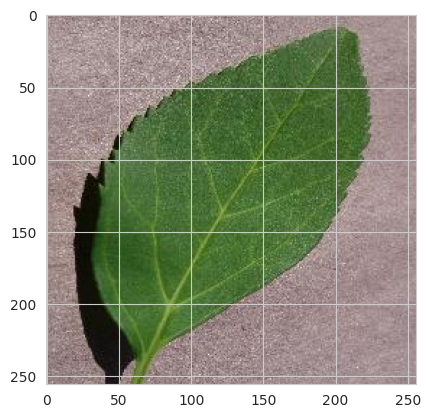

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Test

(20, 256, 256, 3)


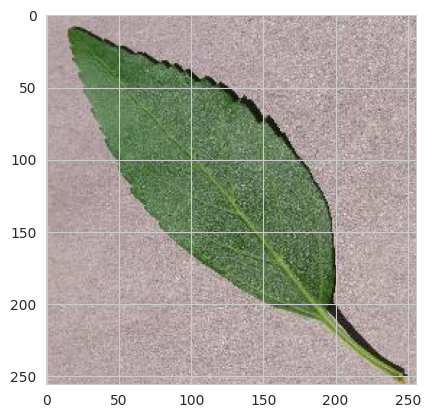

(20, 256, 256, 3)


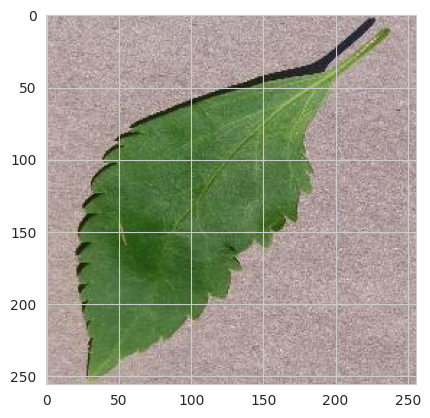

(20, 256, 256, 3)


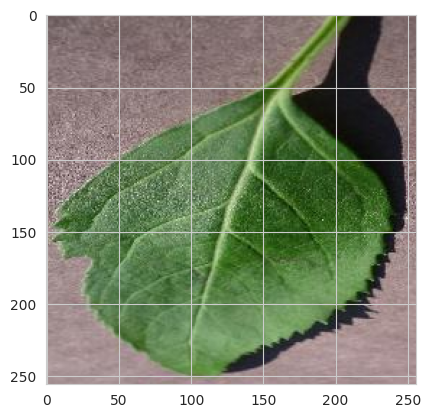

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

---

### Save class_indices

- This cell will save the indices for the labels to class_indices.pkl and print out the stored index value for each label

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

class_indices = joblib.load(f"{file_path}/class_indices.pkl")
print(class_indices)

{'healthy': 0, 'powdery_mildew': 1}


---

## **6. Model Creation**

### TensorFlow

- Importing TensorFlow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

- Create the model

In [20]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

- Model summary

In [21]:
create_tf_model().summary()

2023-10-21 13:18:18.586819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

- Early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

- Fit the Model for training

In [ ]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-10-21 13:18:19.587670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
147/147 [==============================] - 350s 2s/step - loss: 0.3012 - accuracy: 0.8697 - val_loss: 0.0474 - val_accuracy: 0.9857
Epoch 2/25
147/147 [==============================] - 350s 2s/step - loss: 0.0957 - accuracy: 0.9720 - val_loss: 0.0346 - val_accuracy: 0.9952
Epoch 3/25
147/147 [==============================] - 346s 2s/step - loss: 0.0907 - accuracy: 0.9733 - val_loss: 0.1204 - val_accuracy: 0.9667
Epoch 4/25
147/147 [==============================] - 344s 2s/step - loss: 0.0631 - accuracy: 0.9832 - val_loss: 0.0433 - val_accuracy: 0.9905
Epoch 5/25
147/147 [==============================] - 352s 2s/step - loss: 0.0428 - accuracy: 0.9904 - val_loss: 0.0169 - val_accuracy: 0.9976
Epoch 6/25
147/147 [==============================] - 348s 2s/step - loss: 0.0627 - accuracy: 0.9791 - val_loss: 0.0181 - val_accuracy: 0.9929
Epoch 7/25
147/147 [==============================] - 361s 2s/step - loss: 0.0311 - accuracy: 0.9938 - val_loss: 0.0340 - val_accuracy: 0.9881

- Save the model

In [ ]:
model.save('outputs/v1/cherry_leaves_model.h5')

In [ ]:
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)


# Lets check the file size of MS Paint exe 
# or you can use any file path
file_path = r"outputs/v1/cherry_leaves_model.h5"
print (file_size(file_path))

### Model Performace

## **5 .Conclusions and Next Steps**

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)